# 2021W AML 2404 2 [B124] AI AND ML LAB

**The Guardians**
* Ankur Kishorbhai Rokad (C0793757)
* Avinash Ravi (C0791941)
* Sahista Patel (C0796681)
* Vishal Sabarinath Venkatesan (C0801202)

## Why LSTM?
An embedding layer, a convolutional layer, and a dense layer to take advantage of all of the deep learning features 
that can be helpful for our application. With Keras, we can build the model very simply.

In [2]:
import pandas as pd
import numpy as np

#Validation Imports
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.models import load_model

#Plotting Imports
import matplotlib.pyplot as plt
import itertools

#For clean Visualization
import warnings
warnings.filterwarnings('ignore')

import time
start = time. time()

## Importing clean dataset

In [2]:
df = pd.read_csv("DataSet/clean_ds.csv")
df = df.dropna()
df.head()

,text,label
0,unit state budget fight loom republican flip f...,1
1,unit state militari accept transgend recruit m...,1
2,senior unit state republican senat let mr muel...,1
3,fbi russia probe help australian diplomat tip ...,1
4,trump want postal servic charg much amazon shi...,1


In [50]:
# Get the Independent Features
X = df.drop('label', axis=1)
# Get the Dependent features
y = df['label']

## Vectorizing the text

In [53]:
# Vocabulary size
voc_size = 5000

In [54]:
onehot_repr = [one_hot(words, voc_size) for words in df['text'].values]
onehot_repr[:5]

[[706,
  4563,
  667,
  1705,
  2677,
  148,
  1882,
  3993,
  1857,
  3022,
  487,
  148,
  430,
  706,
  4563,
  3086,
  4326,
  2012,
  1229,
  4600,
  4400,
  112,
  3167,
  4080,
  3049,
  25,
  3993,
  487,
  1461,
  3034,
  667,
  4152,
  4408,
  2414,
  2598,
  623,
  2096,
  4807,
  148,
  706,
  4563,
  4727,
  3200,
  2371,
  1796,
  3597,
  3913,
  4400,
  149,
  2513,
  2216,
  4124,
  3816,
  2853,
  4458,
  474,
  2376,
  2018,
  229,
  3954,
  2853,
  3488,
  1973,
  4336,
  4124,
  667,
  1705,
  3547,
  4734,
  190,
  4389,
  4259,
  1681,
  1829,
  428,
  3808,
  987,
  2878,
  148,
  1400,
  2414,
  3787,
  3086,
  4801,
  604,
  3291,
  148,
  2235,
  2282,
  667,
  2582,
  4371,
  3816,
  3615,
  2126,
  2235,
  3179,
  2582,
  2280,
  3275,
  3296,
  3816,
  2995,
  668,
  1612,
  822,
  4297,
  197,
  1954,
  858,
  625,
  261,
  3291,
  990,
  208,
  840,
  4655,
  1596,
  2582,
  2280,
  3275,
  3296,
  3816,
  526,
  787,
  2371,
  3391,
  279,
  1893,
  2046

In [55]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[ 292 3801 2260 ... 2858 4326 2629]
 [ 669 3939 4974 ... 2119 4232 1878]
 [4454 2096  570 ... 3697 2651 2147]
 ...
 [1731 3627 1014 ...  371  497 2525]
 [3988 4251  707 ... 4211 1887  439]
 [4667 2354 1535 ... 3291 1882 1857]]


## Modeling

In [56]:
embedding_vector_features = 40
model = Sequential()
model.add(
    Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
len(embedded_docs), y.shape

(45405, (45405,))

In [58]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
X_final.shape, y_final.shape

((45405, 20), (45405,))

### Train-test splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_final,
                                                    y_final,
                                                    test_size=0.33,
                                                    random_state=42)

### Model training

In [60]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=64)

Epoch 1/10
476/476 [==============================] - 13s 22ms/step - loss: 0.3634 - accuracy: 0.8172 - val_loss: 0.2052 - val_accuracy: 0.9200
Epoch 2/10
476/476 [==============================] - 10s 21ms/step - loss: 0.1567 - accuracy: 0.9400 - val_loss: 0.1959 - val_accuracy: 0.9222
Epoch 3/10
476/476 [==============================] - 9s 19ms/step - loss: 0.1176 - accuracy: 0.9586 - val_loss: 0.2103 - val_accuracy: 0.9178
Epoch 4/10
476/476 [==============================] - 9s 18ms/step - loss: 0.0968 - accuracy: 0.9669 - val_loss: 0.2302 - val_accuracy: 0.9171
Epoch 5/10
476/476 [==============================] - 9s 18ms/step - loss: 0.0697 - accuracy: 0.9762 - val_loss: 0.2574 - val_accuracy: 0.9110
Epoch 6/10
476/476 [==============================] - 9s 18ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.3015 - val_accuracy: 0.9121
Epoch 7/10
476/476 [==============================] - 9s 18ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.3723 - val_accuracy: 0.91

We tried one more model with dropouts.

In [61]:
## Creating model
embedding_vector_features = 40
model = Sequential()
model.add(
    Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model training

In [62]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=20,
          batch_size=64)

Epoch 1/20
476/476 [==============================] - 12s 21ms/step - loss: 0.3763 - accuracy: 0.8140 - val_loss: 0.2007 - val_accuracy: 0.9202
Epoch 2/20
476/476 [==============================] - 9s 19ms/step - loss: 0.1620 - accuracy: 0.9401 - val_loss: 0.1993 - val_accuracy: 0.9234
Epoch 3/20
476/476 [==============================] - 9s 19ms/step - loss: 0.1317 - accuracy: 0.9515 - val_loss: 0.2037 - val_accuracy: 0.9206
Epoch 4/20
476/476 [==============================] - 9s 19ms/step - loss: 0.1142 - accuracy: 0.9565 - val_loss: 0.2149 - val_accuracy: 0.9180
Epoch 5/20
476/476 [==============================] - 9s 19ms/step - loss: 0.1016 - accuracy: 0.9625 - val_loss: 0.2253 - val_accuracy: 0.9162
Epoch 6/20
476/476 [==============================] - 9s 19ms/step - loss: 0.0870 - accuracy: 0.9702 - val_loss: 0.2322 - val_accuracy: 0.9137
Epoch 7/20
476/476 [==============================] - 9s 19ms/step - loss: 0.0736 - accuracy: 0.9756 - val_loss: 0.2706 - val_accuracy: 0.911

In [63]:
y_pred = model.predict_classes(X_test)

## Model evaluation

In [65]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

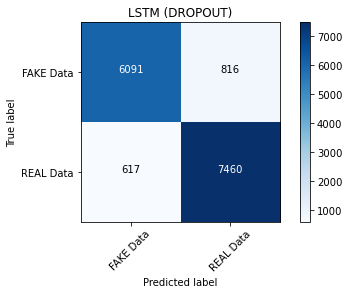

In [66]:
#Training Accuracy
Y_predict = model.predict(X_train)

#Actual Modeling
# svm_pred = classifier_svm.predict(X_test)
lstm_pred = model.predict_classes(X_test)

# print(get_metrics("LSTM", y_train, Y_predict, y_test, lstm_pred))
cm = metrics.confusion_matrix(y_test, lstm_pred)
plot_confusion_matrix(cm,
                      classes=['FAKE Data', 'REAL Data'],
                      title="LSTM (DROPOUT)")

In [67]:
print(lstm_pred)

[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [68]:
accuracy_score(y_test, y_pred)

0.9043646556326749

## Exporting the model

In [69]:
model.save('models/lstm_model_h5.h5')